# Настройка ноутбука

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

**Курс:**
- [Stepik: Основы статистики - Центральная предельная теорема](https://stepik.org/lesson/8077?unit=1357)


**Статьи:**
- [MathFandom: Центральная предельная теорема](https://math.fandom.com/ru/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0)

**Калькуляторы:**
- [Cимуляция данных для центральной предельной теоремы](https://gallery.shinyapps.io/CLT_mean/)

**Видео:**
- [3Blue1Brown: But what is the Central Limit Theorem?](https://www.youtube.com/watch?v=zeJD6dqJ5lo&ab_channel=3Blue1Brown)
- [StatQuest: The Central Limit Theorem, Clearly Explained!!!](https://www.youtube.com/watch?v=YAlJCEDH2uY&ab_channel=StatQuestwithJoshStarmer)
- [StatQuest: The standard error, Clearly Explained!!!](https://www.youtube.com/watch?v=XNgt7F6FqDU)
- [StatQuest: Standard Deviation vs Standard Error, Clearly Explained!!!](https://www.youtube.com/watch?v=A82brFpdr9g)

# Теория

Вне зависимости от типа распределения, значений среднего и стандартного отклонения, распределение средних, взятых в случайных выборках из Генеральной Совокупности будет распределено нормально.

Среднее значение выборки "стремиться" к среднему значению генеральной совокупности?

**Стандартная ошибка среднего (Standart Error of Means - SEM)** - это среднеквадратическое отклонение распределения выборочных средних.

<img src="data/img/SE.png" width="400">

    По идее, эта статистика показывает, сколько в среднем, каждое измерение вносит в дисперсию. И от этого значения мы берем квадратный корень. Вопрос, почему бы в таком случае делить на n, а сразу стандартное отклонение?

Чем больше размер выборки, тем больше она "приближается" к генеральной совокупности - тем больше она похожа на генеральною совокупность.

Исходное распределение может быть не нормальным (пусть, например, пуассоновским), но при этом распределение средних значений выборок будет нормальным.

- Если наблюдений в выборке будет больше, то все выборочные средние будут ближе к среднему ГС.
- Если элементов в нашей ГС будет больше, то изменчивость всех выборочных средних будет меньше.
- Если изменчивость исследуемых признаков ГС будет меньше, то сильные отклонения выборочных средних  от среднего в ГС будут возникать реже.

Поэтому,  если число наблюдений будет больше или  если изменчивость исследуемого признака будет меньше, то стандартная ошибка среднего будет меньше


- Распределение выборочных средних является нормальным, со средним равным среднему значению признака в генеральной совокупности
- Стандартная ошибка среднего тем меньше, чем больше объем выборки и меньше вариативность исследуемого признака
- Чем меньше стандартная ошибка среднего, тем реже выборочные средние будут сильно отклоняться от среднего в генеральной совокупности

Благодаря Центральной предельной теореме мы можем, основываясь только на данных одной выборки, мы можем предположить как бы вели себя выборочные средние множества выборок при многократном повторении исследования. 

Это открывает нам дорогу к доверительному интервалу.

#### Примеры задач:

- [Stratascratch: Central Limit Theorem - Hard](https://platform.stratascratch.com/technical/2386-central-limit-theorem)

Explain central limit theorem.

Central limit theorem can be explained in multiple parts:

a. The average of the sample means is equal to the mean of the population, regardless the sample size or the population distribution.

b. The standard deviation of the sample means is equal to the standard deviation of the population divided by square root the sample size.

c. If the population is normal distribution, the sampling distribution of the sample means will have a normal distribution regardless the sample size.

d. If the population distribution isn't normal, sample sizes of 30 or more are frequently regarded adequate for the CLT to hold.

### Моделирование распределения средних

In [5]:
mu = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение

# Сгенерим нашу генеральную совокупность
genpop = pd.Series(np.random.normal(mu, sigma, 1_000_000))

In [6]:
n_samples = 300
sample_means = pd.Series([genpop.sample(n=300).mean() for sample in range(n_samples)])

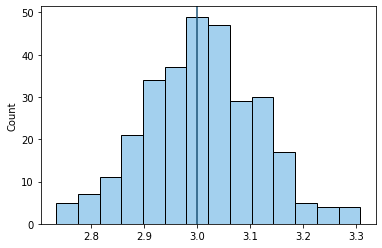

In [7]:
sns.histplot(x=sample_means, color='#85C1E9')
plt.axvline(mu, color='#1A5276');

### Эксперимент с костями

Берём две "идеальных" кости, кидаем и в качестве результата эксперимента берём сумму показаний обоих костей. Сумма уже не имеет равновероятного распределения. Она принимает значения от 2 до 12 и при этом количество комбинаций, при которых получается число 7 составляет 6, в то время как способов составить любые другие варианты результата получается меньше. Таким образом выпадение различных испытаний нашего испытания (которые принимают значения от 2 до 12) уже не равновероятно.

In [8]:
d = 1_000_000
n_dices = 4
results = pd.DataFrame({
    f'Dice_{num}': np.random.randint(low=1, high=7, size=(d,)) for num in range(1, n_dices+1)
})
dice_cols = results.columns


results['Comb'] = results[dice_cols].apply(lambda vals: '_'.join(list(map(str, vals))), axis=1)
results['Sum'] = results[dice_cols].apply(sum, axis=1)
results.head()

,Dice_1,Dice_2,Dice_3,Dice_4,Comb,Sum
0,6,5,5,4,6_5_5_4,20
1,5,2,3,5,5_2_3_5,15
2,5,3,4,2,5_3_4_2,14
3,3,2,5,5,3_2_5_5,15
4,4,2,5,6,4_2_5_6,17


In [9]:
results.groupby(['Sum', 'Comb']).apply(lambda gr: gr.shape[0]).rename('Count')

Sum  Comb   
4    1_1_1_1    746
5    1_1_1_2    777
     1_1_2_1    739
     1_2_1_1    785
     2_1_1_1    808
               ... 
23   5_6_6_6    779
     6_5_6_6    746
     6_6_5_6    778
     6_6_6_5    763
24   6_6_6_6    765
Name: Count, Length: 1296, dtype: int64



Далее, усложняем наш эксперимент, многократно увеличивая число костей. В итоге, с каждым последующим увеличением числа костей мы будем  получать распределение комбинаций получения различных результатов всё более и более близким к нормальному распределению. А поскольку выпадение каждого результата на отдельной кости равновероятно, то при многократном повторении испытания при фиксированном числе костей гистограмма будет отражать частоту появления каждого результата.

Именно в этом сила и смысл ЦПТ. Если на результат воздействует множество независимых мелких факторов, то результирующая величина будет иметь распределение близкое к нормальному. В этом её суть, если изложить её простым языком.

(Второй её глубинной сутью является то, что при многократном повторении испытаний относительная частота появления случайной величины становится приблизительно равной её вероятности. Но это относится не к обсуждаемой сегодня теме.)

Мораль: Способов добиться средних результатов гораздо больше, чем выдающихся или посредственных.

In [10]:
d = 1_000_000
n_dices = 4
results = pd.DataFrame({
    f'Dice_{num}': np.random.randint(low=1, high=7, size=(d,)) for num in range(1, n_dices+1)
})
dice_cols = results.columns


results['Comb'] = results[dice_cols].apply(lambda vals: '_'.join(list(map(str, vals))), axis=1)
results['Sum'] = results[dice_cols].apply(sum, axis=1)
results.head()

,Dice_1,Dice_2,Dice_3,Dice_4,Comb,Sum
0,2,4,6,2,2_4_6_2,14
1,1,3,3,1,1_3_3_1,8
2,3,3,5,1,3_3_5_1,12
3,5,4,3,3,5_4_3_3,15
4,5,6,6,2,5_6_6_2,19


In [11]:
dist = results.groupby(['Sum', 'Comb']).apply(lambda gr: gr.shape[0]).rename('Count')
dist

Sum  Comb   
4    1_1_1_1    773
5    1_1_1_2    800
     1_1_2_1    762
     1_2_1_1    749
     2_1_1_1    777
               ... 
23   5_6_6_6    785
     6_5_6_6    834
     6_6_5_6    778
     6_6_6_5    772
24   6_6_6_6    786
Name: Count, Length: 1296, dtype: int64

In [12]:
combs_dist = results.Comb.value_counts().sort_index()
combs_dist

Comb
1_1_1_1    773
1_1_1_2    800
1_1_1_3    733
1_1_1_4    793
1_1_1_5    803
          ... 
6_6_6_2    799
6_6_6_3    730
6_6_6_4    798
6_6_6_5    772
6_6_6_6    786
Name: count, Length: 1296, dtype: int64

Результаты подбрасывания кубика имеют равномерное распредление. Если посчитать количество уникальных комбинаций после подбрасывания 4 костей, они также будут распределены равномерно. Однако их суммы будут иметь нормальное распределение. 

**Почему комбинации равномерно распределенных вечилин имеют равномерное распределение?**

**Почему сумма равномерно распределенных величин имеют нормальное распределение?**
Сумма получается большим, если его слогаемые большие. Также маленькие суммы состоят из небольших слагаемых. Комбинация равнораспреде
